https://www.kaggle.com/PromptCloudHQ/australian-job-listings-data-from-seek-job-board

In [1]:
%cd ..

/home/elena/Documents/Project_jobs


In [2]:
import zipfile
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
zf = zipfile.ZipFile('data/australian-job-listings-data-from-seek-job-board.zip') 
df = pd.read_csv(zf.open('seek_australia_sample.csv'), encoding='latin')
df.head()

,pageurl,crawl_timestamp,job_title,category,company_name,city,post_date,job_description,job_type,job_board,geo,state,salary_offered
0,https://www.seek.com.au/job/36028685,2018-04-20 03:57:04 +0000,Package Lead - Pipeline Installation,"Mining, Resources & Energy",FIRCROFT AUSTRALIA PTY LTD,Perth,2018-04-19T05:41:52Z,The Role: General Execution Accountable for sa...,Contract/Temp,seek,AU,NaN,NaN
1,https://www.seek.com.au/job/36028693,2018-04-20 03:52:46 +0000,Department Manager - Bakery - Campbelltown Region,Retail & Consumer Products,Coles,Sydney,2018-04-19T05:42:19Z,The role As a Coles Bakery Manager you will: w...,Full Time,seek,AU,South West & M5 Corridor,NaN
2,https://www.seek.com.au/job/36027858,2018-04-20 04:12:01 +0000,Freight Handler,"Manufacturing, Transport & Logistics",Zoom Recruitment & Training,Sydney,2018-04-19T04:51:51Z,Our client is a leader within the Transport / ...,Casual/Vacation,seek,AU,Parramatta & Western Suburbs,$34 - $39 p.h.
3,https://www.seek.com.au/job/36028687,2018-04-20 03:51:23 +0000,Warehouse Assistant,"Manufacturing, Transport & Logistics",Private Advertiser,Bundaberg & Wide Bay Burnett,2018-04-19T05:42:02Z,One of our Clients is looking for a Warehouse ...,Full Time,seek,AU,NaN,NaN
4,https://www.seek.com.au/job/36026414,2018-04-20 04:14:42 +0000,HR Truck Subcontractors,"Manufacturing, Transport & Logistics",Sands Fridge Lines,Perth,2018-04-19T03:22:40Z,Sands Fridge Lines WA is seeking Subcontractor...,Contract/Temp,seek,AU,NaN,NaN


In [4]:
df.shape
df['post_date'].dtype
df['post_date'] = pd.to_datetime(df['post_date'])
df['date'] = df['post_date'].dt.date
df['date'] = pd.to_datetime(df['date'])
df.head()
# df.dtypes

,pageurl,crawl_timestamp,job_title,category,company_name,city,post_date,job_description,job_type,job_board,geo,state,salary_offered,date
0,https://www.seek.com.au/job/36028685,2018-04-20 03:57:04 +0000,Package Lead - Pipeline Installation,"Mining, Resources & Energy",FIRCROFT AUSTRALIA PTY LTD,Perth,2018-04-19 05:41:52+00:00,The Role: General Execution Accountable for sa...,Contract/Temp,seek,AU,NaN,NaN,2018-04-19
1,https://www.seek.com.au/job/36028693,2018-04-20 03:52:46 +0000,Department Manager - Bakery - Campbelltown Region,Retail & Consumer Products,Coles,Sydney,2018-04-19 05:42:19+00:00,The role As a Coles Bakery Manager you will: w...,Full Time,seek,AU,South West & M5 Corridor,NaN,2018-04-19
2,https://www.seek.com.au/job/36027858,2018-04-20 04:12:01 +0000,Freight Handler,"Manufacturing, Transport & Logistics",Zoom Recruitment & Training,Sydney,2018-04-19 04:51:51+00:00,Our client is a leader within the Transport / ...,Casual/Vacation,seek,AU,Parramatta & Western Suburbs,$34 - $39 p.h.,2018-04-19
3,https://www.seek.com.au/job/36028687,2018-04-20 03:51:23 +0000,Warehouse Assistant,"Manufacturing, Transport & Logistics",Private Advertiser,Bundaberg & Wide Bay Burnett,2018-04-19 05:42:02+00:00,One of our Clients is looking for a Warehouse ...,Full Time,seek,AU,NaN,NaN,2018-04-19
4,https://www.seek.com.au/job/36026414,2018-04-20 04:14:42 +0000,HR Truck Subcontractors,"Manufacturing, Transport & Logistics",Sands Fridge Lines,Perth,2018-04-19 03:22:40+00:00,Sands Fridge Lines WA is seeking Subcontractor...,Contract/Temp,seek,AU,NaN,NaN,2018-04-19


In [5]:
# df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
# df.head()

In [6]:
df.job_title.str.lower().value_counts().head()

project manager                 77
business development manager    71
business analyst                55
receptionist                    52
administration assistant        52
Name: job_title, dtype: int64

In [7]:
def scatter_plot(name, data):
    data['date'] = data.index
    ax = plt.subplot()
#     month_fmt = mdates.DateFormatter('%M')
    plt.plot('date', 'job_title', data=data, color='green', marker='o')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
#     ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
    _=plt.xticks(rotation=45)
    plt.ylabel('Number of vacancies')
    plt.grid()
    plt.title(name)
    return (plt.savefig("results/" + name + ".png", bbox_inches='tight'), plt.show())

In [8]:
df_project_manager = df[df['job_title'].str.match('project manager', flags=re.IGNORECASE)]
print(df_project_manager.shape)
df_project_manager.head(3)

(180, 14)


,pageurl,crawl_timestamp,job_title,category,company_name,city,post_date,job_description,job_type,job_board,geo,state,salary_offered,date
198,https://www.seek.com.au/job/36027704,2018-04-20 04:04:19 +0000,Project Manager - Wealth Management,Information & Communication Technology,Evolution Specialists,Sydney,2018-04-19 04:43:09+00:00,Project Manager - Business Process Management ...,Contract/Temp,seek,AU,"CBD, Inner West & Eastern Suburbs",NaN,2018-04-19
456,https://www.seek.com.au/job/36025966,2018-04-20 04:15:38 +0000,Project Manager,Real Estate & Property,Gough Property & Real Estate Recruiters,Brisbane,2018-04-19 02:45:34+00:00,Our client is a leading national property comp...,Full Time,seek,AU,CBD & Inner Suburbs,NaN,2018-04-19
689,https://www.seek.com.au/job/36027432,2018-04-20 04:06:13 +0000,Project Manager - Retail & Commercial Projects,Construction,BLACK & CO RECRUITMENT PTY LTD,Sydney,2018-04-19 04:27:02+00:00,Contracts Administrator - Retail & Commercial ...,Full Time,seek,AU,Parramatta & Western Suburbs,"$140,000 - $160,000",2018-04-19


In [9]:
# df_project_manager.dtypes
df_project_manager_resample_M = df_project_manager.resample('M', on='date').count()
df_project_manager_resample_M[['job_title']]
# df_project_manager_resample_M

,job_title
date,
2018-04-30,22
2018-05-31,24
2018-06-30,37
2018-07-31,29
2018-08-31,3
2018-09-30,19
2018-10-31,39
2018-11-30,7


In [10]:
# df_project_manager_resample_M['date'] = df_project_manager_resample_M.index
# # df_project_manager_resample_M.reset_index(level=0, inplace=True)
# df_project_manager_resample_M

# ax = plt.subplot()
# month_fmt = mdates.DateFormatter('%M')
# plt.scatter(x='date', y='job_title', data=df_project_manager_resample_M, color='green')
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=90)
# plt.ylabel('Number of vacancies')
# plt.title('Project managers')
# plt.grid()
# plt.show()
# # df_project_manager_resample_M.plot(y='job_title', use_index=True, kind='scatter')


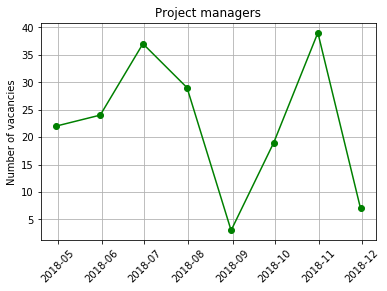

(None, None)

In [11]:
scatter_plot('Project managers', df_project_manager_resample_M)

In [12]:
# df_project_manager['month_year'].value_counts()
# df_project_manager = df_project_manager.sort_values('month_year')
# print(df_project_manager['month_year'].value_counts(sort=False))

# height = df_project_manager['month_year'].value_counts(sort=False).tolist()
# bars = df_project_manager['month_year'].unique()
# x_pos = np.arange(len(bars))

# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# # print (height, '\n', bars)
# plt.bar(x_pos, height)
# plt.xticks(x_pos, bars)
# # plt.bar(df_project_manager['month_year'])
# plt.show()

In [13]:
# # ax = sns.scatterplot(x=bars, y=height)
# print (height, '\n', bars)

# # dates = [pd.to_datetime(d) for d in bars]
# # plt.scatter(bars, height)
# # plt.plot_date(bars, height, c = 'red')
# # plt.show()
# # print(dates)

In [14]:
df_business_dev_manager = df[df['job_title'].str.match('business development manager', flags=re.IGNORECASE)]
df_business_dev_manager.head()
# df_business_dev_manager.shape

,pageurl,crawl_timestamp,job_title,category,company_name,city,post_date,job_description,job_type,job_board,geo,state,salary_offered,date
25,https://www.seek.com.au/job/36026236,2018-04-20 04:13:14 +0000,Business Development Manager,Sales,National Distribution Centre Services,Sydney,2018-04-19 03:07:16+00:00,Business Development Manager We are an Austr...,Full Time,seek,AU,"CBD, Inner West & Eastern Suburbs",NaN,2018-04-19
265,https://www.seek.com.au/job/36026003,2018-04-20 04:16:50 +0000,Business Development Manager,Insurance & Superannuation,Robert Walters,Perth,2018-04-19 02:46:28+00:00,"Located within minutes of the Perth CBD, this ...",Full Time,seek,AU,"CBD, Inner & Western Suburbs",Competitive Salary,2018-04-19
508,https://www.seek.com.au/job/36027545,2018-04-20 04:10:16 +0000,Business Development Manager,Sales,"Randstad - Sales, Marketing & Communications",Sydney,2018-04-19 04:32:20+00:00,You will be calling customers who have Cell To...,Full Time,seek,AU,"CBD, Inner West & Eastern Suburbs",$75k - $95k p.a. + Super + Commission,2018-04-19
570,https://www.seek.com.au/job/36027757,2018-04-20 04:11:31 +0000,Business Development Manager - Canberra - Defence,Sales,Serco Asia Pacific,Sydney,2018-04-19 04:45:32+00:00,"Serco is an extraordinary company, making a po...",Full Time,seek,AU,"CBD, Inner West & Eastern Suburbs",Highly competitive salary package on offer in ACT,2018-04-19
592,https://www.seek.com.au/job/36028884,2018-04-20 03:53:17 +0000,Business Development Manager,Sales,Shelby Consulting,Perth,2018-04-19 05:51:55+00:00,An opportunity exists for an experienced and p...,Casual/Vacation,seek,AU,"CBD, Inner & Western Suburbs",NaN,2018-04-19


In [15]:
df_business_dev_manager.dtypes
df_business_dev_manager_resample_M = df_business_dev_manager.resample('M', on='date').count()
df_business_dev_manager_resample_M[['job_title']]

,job_title
date,
2018-04-30,19
2018-05-31,9
2018-06-30,19
2018-07-31,13
2018-08-31,15
2018-09-30,17
2018-10-31,28
2018-11-30,5


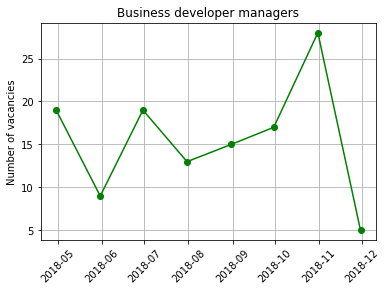

(None, None)

In [16]:
scatter_plot('Business developer managers', df_business_dev_manager_resample_M)

In [17]:
# !pip install plotly

In [18]:
# import plotly.graph_objects as go
# import numpy as np

# # x = np.arange(10)

# fig = go.Figure(data=go.Scatter(x=df_business_dev_manager_resample_M['date'], y=df_business_dev_manager_resample_M['job_title']))
# fig.show()

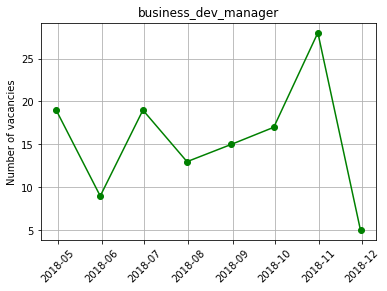

In [19]:
# df_business_dev_manager_resample_M['date'] = df_business_dev_manager_resample_M.index
# # df_business_dev_manager_resample_M.sort_index(inplace=True)
# ax = plt.subplot()
# # month_fmt = mdates.DateFormatter('%M')
# plt.plot(x=df_business_dev_manager_resample_M['date'], y=df_business_dev_manager_resample_M['job_title'], color='green', marker='-o')
# # ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# # _=plt.xticks(rotation=90)
# plt.xticks(rotation=45)
# plt.ylabel('Number of vacancies')
# plt.grid()
# plt.title('Business developer managers')

df_business_dev_manager_resample_M['date'] = df_business_dev_manager_resample_M.index
ax = plt.subplot()
#     month_fmt = mdates.DateFormatter('%M')
# plt.scatter(x='date', y='job_title', data=df_business_dev_manager_resample_M, color='green')
plt.plot('date', 'job_title', data=df_business_dev_manager_resample_M, color='green', marker='o')
# ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
#     ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
plt.ylabel('Number of vacancies')
plt.grid()
plt.title('business_dev_manager')
plt.show()

In [20]:
# df_business_dev_manager_resample_M['date'].values

In [21]:
# vals = list(zip(df_business_dev_manager_resample_M['date'].values, df_business_dev_manager_resample_M['job_title'].values))

In [22]:
df.category.str.lower().value_counts().head()

trades & services                         2056
information & communication technology    1911
healthcare & medical                      1535
manufacturing, transport & logistics      1523
administration & office support           1250
Name: category, dtype: int64

In [23]:
df_data = df[df['job_title'].str.match('Data', flags=re.IGNORECASE)]
df_data['job_title'].value_counts().head()

Data Analyst               14
Data Scientist             10
Data Entry Officer          4
Data Collector - Casual     2
Data Architect              2
Name: job_title, dtype: int64

In [24]:
df_data.dtypes
df_data_resample_M = df_data.resample('M', on='date').count()
df_data_resample_M[['job_title']]

,job_title
date,
2018-04-30,7
2018-05-31,4
2018-06-30,13
2018-07-31,9
2018-08-31,8
2018-09-30,13
2018-10-31,22
2018-11-30,4


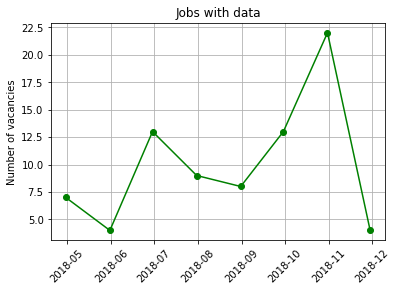

(None, None)

In [25]:
scatter_plot('Jobs with data', df_data_resample_M) # with november something is wrong but

In [26]:
df_blockchain = df[df['job_title'].str.match('Blockchain', flags=re.IGNORECASE)]
df_blockchain.head()

,pageurl,crawl_timestamp,job_title,category,company_name,city,post_date,job_description,job_type,job_board,geo,state,salary_offered,date
17465,https://www.seek.com.au/job/36408049,2018-06-08 06:43:41 +0000,Blockchain Software Developer,Information & Communication Technology,CJ Platinum,Sydney,2018-06-06 03:24:52+00:00,NaN,Full Time,seek,AU,North Shore & Northern Beaches,NaN,2018-06-06


In [27]:
df_blockchain.dtypes
df_blockchain_resample_M = df_blockchain.resample('M', on='date').count()
df_blockchain_resample_M[['job_title']]

,job_title
date,
2018-06-30,1


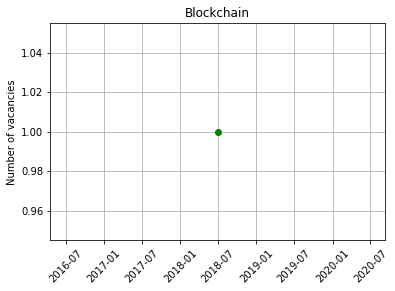

(None, None)

In [28]:
scatter_plot('Blockchain', df_blockchain_resample_M)